In [7]:
import os
os.chdir('/workspace')
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from omegaconf import OmegaConf
import japanize_matplotlib
%matplotlib inline


### 作成した特徴量確認

In [11]:
train_features = glob.glob("results/features/exp001/*_train.pkl")
dfs = [pd.read_pickle(f) for f in train_features]
train_df = pd.concat(dfs, axis=1)
train_df


,agg_mean_Age_gropuby_Sex,agg_std_Age_gropuby_Sex,agg_max_Age_gropuby_Sex,agg_min_Age_gropuby_Sex,agg_mean_Pclass_gropuby_Sex,agg_std_Pclass_gropuby_Sex,agg_max_Pclass_gropuby_Sex,agg_min_Pclass_gropuby_Sex,Age,SibSp,...,ce_Ticket,ce_Cabin,ce_Embarked,le_Pclass,le_Name,le_Sex,le_Ticket,le_Cabin,le_Embarked,Survived
0,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,22.0,1,...,1,1014,914,2,155,1,720,-999,2,0
1,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,38.0,1,...,2,2,270,0,286,0,816,106,0,1
2,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,26.0,0,...,1,1014,914,2,523,0,914,-999,2,1
3,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,35.0,1,...,2,2,914,0,422,0,65,70,2,1
4,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,35.0,0,...,1,1014,914,2,22,1,649,-999,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,27.0,0,...,1,1014,914,1,811,1,130,-999,2,0
887,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,19.0,0,...,1,1,914,0,464,0,18,40,2,1
888,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,NaN,1,...,4,1014,914,2,607,0,923,-999,2,0
889,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,26.0,0,...,1,1,270,0,113,1,11,77,0,1


In [14]:
test_features = glob.glob("results/features/exp001/*_test.pkl")
dfs = [pd.read_pickle(f) for f in test_features]
test_df = pd.concat(dfs, axis=1)
test_df


,agg_mean_Age_gropuby_Sex,agg_std_Age_gropuby_Sex,agg_max_Age_gropuby_Sex,agg_min_Age_gropuby_Sex,agg_mean_Pclass_gropuby_Sex,agg_std_Pclass_gropuby_Sex,agg_max_Pclass_gropuby_Sex,agg_min_Pclass_gropuby_Sex,ce_Pclass,ce_Name,...,le_Name,le_Sex,le_Ticket,le_Cabin,le_Embarked,te_Sex,Age,SibSp,Parch,Fare
0,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,709,2,...,638,1,376,-999,1,0.188908,34.5,0,0,7.8292
1,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,709,1,...,1266,0,582,-999,2,0.742038,47.0,1,0,7.0000
2,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,277,1,...,837,1,184,-999,1,0.188908,62.0,0,0,9.6875
3,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,709,1,...,1278,1,366,-999,2,0.188908,27.0,0,0,8.6625
4,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,709,1,...,543,0,338,-999,2,0.742038,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,709,1,...,1126,1,711,-999,2,0.188908,NaN,0,0,8.0500
414,28.687088,14.576962,76.0,0.17,2.154506,0.866181,3,1,323,1,...,891,0,834,64,0,0.742038,39.0,0,0,108.9000
415,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,709,1,...,1046,1,872,-999,2,0.188908,38.5,0,0,7.2500
416,30.585228,14.280581,80.0,0.33,2.372479,0.811908,3,1,709,1,...,1227,1,579,-999,2,0.188908,NaN,0,0,8.0500


In [41]:
print("■ train")
display(train_df.info())
print("■ test")
display(test_df.info())


■ train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   agg_mean_Age_gropuby_Sex     891 non-null    float64
 1   agg_std_Age_gropuby_Sex      891 non-null    float64
 2   agg_max_Age_gropuby_Sex      891 non-null    float64
 3   agg_min_Age_gropuby_Sex      891 non-null    float64
 4   agg_mean_Pclass_gropuby_Sex  891 non-null    float64
 5   agg_std_Pclass_gropuby_Sex   891 non-null    float64
 6   agg_max_Pclass_gropuby_Sex   891 non-null    int64  
 7   agg_min_Pclass_gropuby_Sex   891 non-null    int64  
 8   Age                          714 non-null    float64
 9   SibSp                        891 non-null    int64  
 10  Parch                        891 non-null    int64  
 11  Fare                         891 non-null    float64
 12  te_Sex                       891 non-null    float64
 13  ce_Pclass   

None

■ test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   agg_mean_Age_gropuby_Sex     418 non-null    float64
 1   agg_std_Age_gropuby_Sex      418 non-null    float64
 2   agg_max_Age_gropuby_Sex      418 non-null    float64
 3   agg_min_Age_gropuby_Sex      418 non-null    float64
 4   agg_mean_Pclass_gropuby_Sex  418 non-null    float64
 5   agg_std_Pclass_gropuby_Sex   418 non-null    float64
 6   agg_max_Pclass_gropuby_Sex   418 non-null    int64  
 7   agg_min_Pclass_gropuby_Sex   418 non-null    int64  
 8   ce_Pclass                    418 non-null    int64  
 9   ce_Name                      418 non-null    int64  
 10  ce_Sex                       418 non-null    int64  
 11  ce_Ticket                    418 non-null    int64  
 12  ce_Cabin                     418 non-null    int64  
 13  ce_Embarked  

None

### 推論結果確認

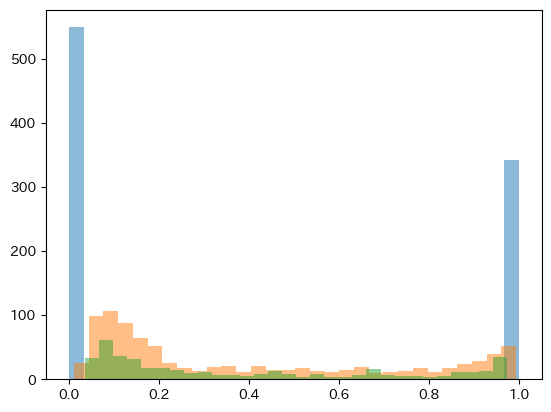

In [40]:
y_true = pd.read_pickle("results/features/exp001/TargetBlock_train.pkl")
oof = pd.read_csv("results/oof/exp001/exp001_20231206_003524_oof.csv")
sub = pd.read_csv("results/submission/exp001/exp001_20231206_003524_submission.csv")

plt.hist(y_true, bins=30, alpha=0.5)
plt.hist(oof, bins=30, alpha=0.5)
plt.hist(sub["Survived"], bins=30, alpha=0.5)
plt.show()
